In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
#from sklearn.metrics import adjusted_rand_score
#from sklearn.cluster import KMeans

In [ ]:
# matplotlib defaults
from google.colab import drive
drive.mount('/content/drive')

cara = pd.read_csv('/content/drive/MyDrive/UniTS/CodeProjects/Unsupervised_Learning/data/cara.csv')
cara

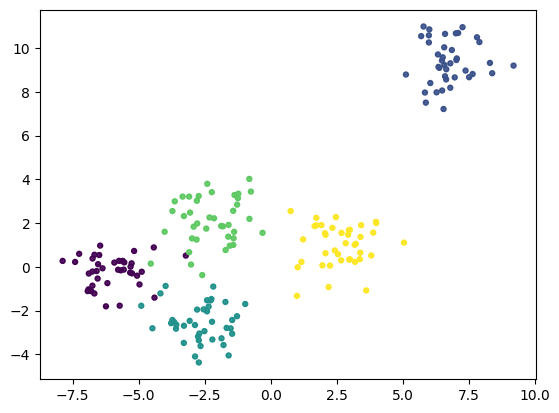

In [38]:
k = 5

data = make_blobs(n_samples=200, n_features=2, centers=k, cluster_std=.9, )
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis', marker=".", s=10, linewidths=3)

In [39]:
def euclidean_dist(A, B):
      return np.sum((A - B)**2)**0.5

def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j[0,0]))

    colors = 10*["g","r","c","b","k"]

    ## Data
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker=".", color=colors[i], s=10, linewidths=3)
        j+=1

    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="x", color="k", s=50, linewidths=2)

    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="o", color="DarkBlue", s=50, linewidths=1)

In [40]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data
        self.centeriod_init = centeriod_init

    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'):
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
            
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids

    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))

        cents = self.initialise_centroids(self.centeriod_init,self.k,data)

        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0

        while changed and num_iter<100:
            changed = False
            
            # for each row in the dataset
            for i in range(m):
                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1
                #calculate distance
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index:
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)

            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig

In [41]:
kmeans = K_Means(k=k,data = data[0],centeriod_init='random')

centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])


index = cluster_assignments[:,0] ## the cluster index
distance = cluster_assignments[:,1]  ## the cluster distance

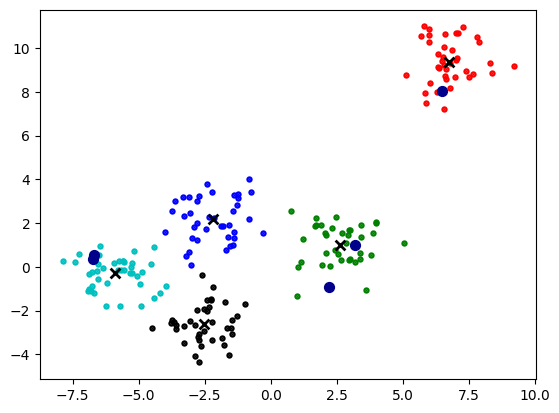

In [42]:
plot(data,k,index,centroids,orig_centroids)

Text(0, 0.5, 'Dispersion')

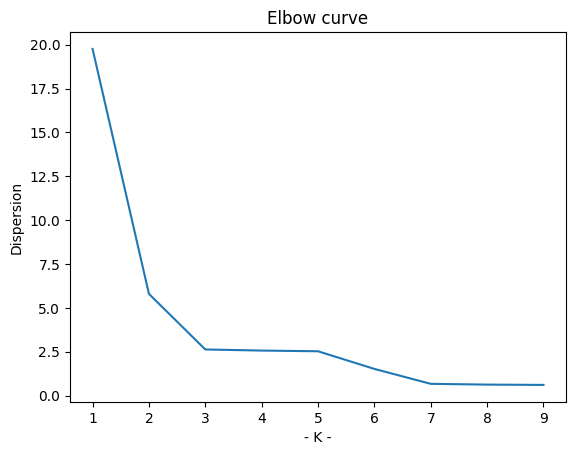

In [43]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    distance = cluster_assignments[:,1]  ## the cluster distances

    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("- K -")
plt.ylabel("Dispersion")

/tmp/ipykernel_6169/1520268167.py:18: RuntimeWarning: invalid value encountered in divide
  s = (dist_ji - a)/max(dist_ji,a)


Text(0, 0.5, 'Dispersion')

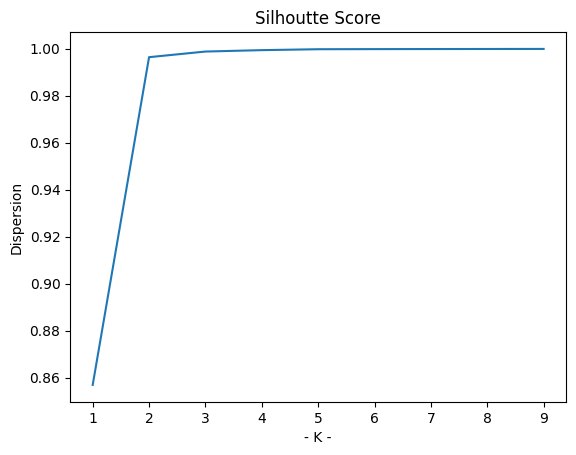

In [44]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = data[0],centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    X = data[0]
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(data[0])):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(data[0])

    a = sum(cluster_assignments[:,1])/(len(data[0])-1)

    if max(dist_ji,a) != 0:
        s = (dist_ji - a)/max(dist_ji,a)
    else:
        s = 0

    s = np.array(s)
    s =  s.item()
    costs.append(s)


x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("- K -")
plt.ylabel("Dispersion")